In [0]:
%matplotlib inline
%reload_ext autoreload
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs
from PIL import Image
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
from google.colab import files
from PIL import Image
from io import BytesIO

In [9]:
uploaded = files.upload()
cvn_b=Image.open(BytesIO(uploaded["cvn_block.png"]))

Saving cvn_block.png to cvn_block (2).png


In [12]:
uploaded = files.upload()
id_b=Image.open(BytesIO(uploaded["identity_block.png"]))

Saving identity_block.png to identity_block (1).png


In [14]:
uploaded = files.upload()
rs_st=Image.open(BytesIO(uploaded["resnet_structure.PNG"]))

Saving resnet_structure.PNG to resnet_structure (1).PNG


# Q4. What is Residual Network? And how is ResNet34 different from ResNet50?

>  **Idea of Residual Network**<br>
> Residual Network comes from motivation to realize one belief; **'Deeper neural network should be able to perform at least as good as smaller neural network if deeper one is built by adding identity layers upon smaller one.'** However in the real world, this isn't always happening because of 'vanishing gradient' issue. 'Vanishing Gradient' problem happens when back-propagated gradient is applied in earlier layers and this multiplicative application is resulting in infinitely small, almost 'vanishing' gradient at the rest of layers.<br>

> ResNet is solving this problem and accoplishing aforementioned belief by implementing 'shortcut branch'.<br>
Suppose each convolution layer $F$ takes input $X$ then outputs $F(X)+b$ where
$b$ represents bias.  If the layer is identity layer, then $F(X)=X$.<br>
Additionally, suppose $H(X)$is desired output, then we can illustrate as $H(X)=F(X)+b$. ResNet, however, makes $H(X)$ to be $H(X)=F(X)+X$ and let model learn to make $F(X)=H(X)-X=0$ Instead of expecting $F(X)=X$ from  $H(X)=F(X)+b$.<br>
Since input X is skipping one or more layers( $F(X)+b$) and being added upon $F(X)+b$, the branch where input X is directly added is called 'shortcut branch'.(where covolution is applied is called 'main branch'.)<br>

> There are two types of shortcut branch; 'identity block' and 'convolutional block.' <br>
* The shortcut branch for identity block is going to be $H(X)=F(X)+X$<br>
* The shortcut branch for the convolution block is going to be $H(X)=F(X)+W\cdot X$ where $W$ represents zero-padding to fit dimension of $X$ to $F(X)$.

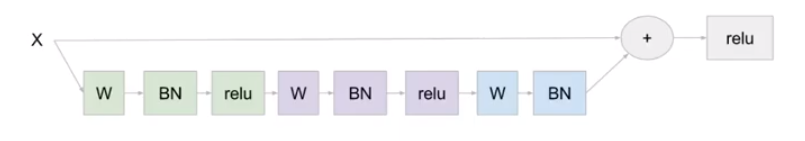

In [26]:
id_b #Picture of Identity Block

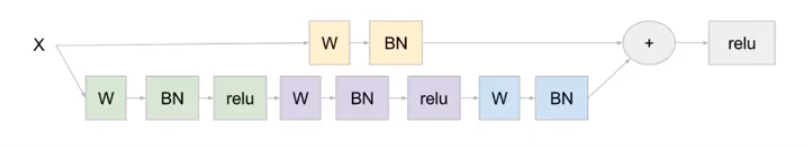

In [27]:
cvn_b #Picture of Convolutional Block

>  **ResNet34 | ResNet50**<br>
> * Number of  Layers : 34 | 53 <br>
* Number of Neurons(million) : 2.86 | 7.4 <br>
* Number of Weights(million) : 21.8 | 25.6 <br>
* When we look at the architecture (image attached below), every 2-layer block of ResNet50 is same as layer net in ResNet 34 and also ResNet50 is in 3-layer bottleneck block while ResNet34 is in 2-layer bottleneck block. Thus to figure out which CNN would outperform, its better to actually input data and compare the error rate and accuracy etc.

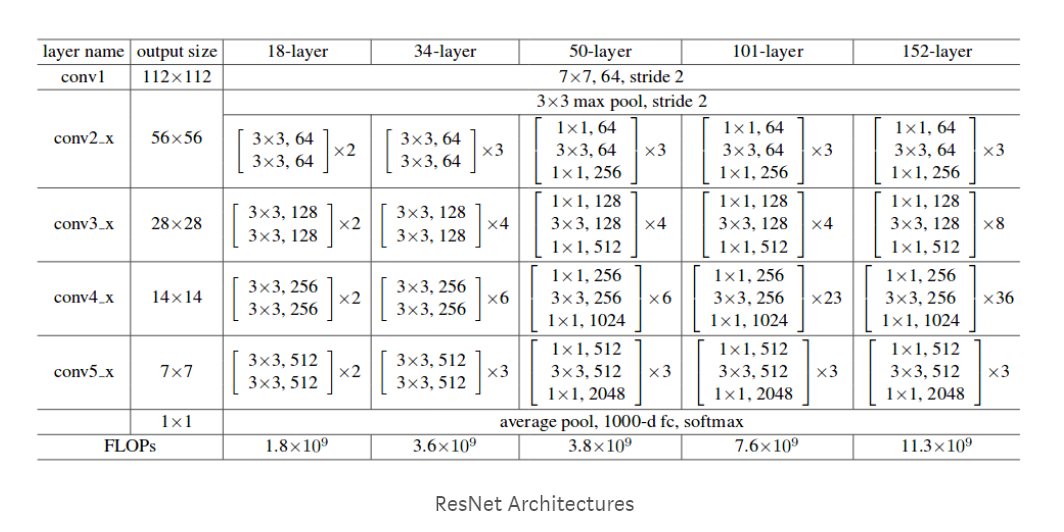

In [28]:
rs_st #Architecture of ResNet34 and ResNet50

# Q5. Transfer Learning
First, loaded PETS data

In [29]:
path2=untar_data(URLs.PETS)
path2.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno=path2/'annotations'
path_img=path2/'images'
fnames=get_image_files(path_img)

In [0]:
pat=r'/([^/]+)_\d+.jpg$'
data2=ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=64).normalize(imagenet_stats)

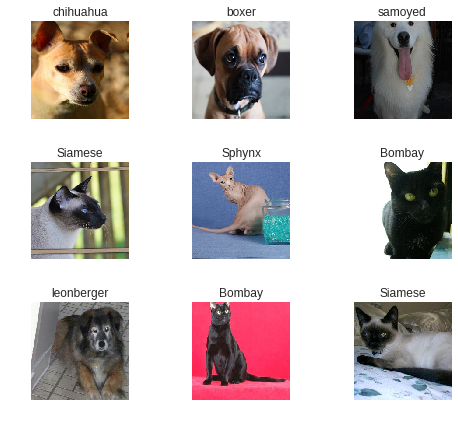

In [51]:
data2.show_batch(rows=3, figsize=(7,6))

Successfully loaded the data. It contains 37 labels.

In [40]:
print(len(data2.classes))

37


In [0]:
q5 = create_cnn(data2, models.resnet34, metrics=error_rate)

In [55]:
q5.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.885173,0.317503,0.097429


In [0]:
q5.save('stage1')

In [57]:
q5.load('stage1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
german_shorthaired,Maine_Coon,american_bulldog,pomeranian,staffordshire_bull_terrier
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bengal,staffordshire_bull_terrier,yorkshire_terrier,Bengal,german_shorthaired
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
      

### Answer
> **Advantage of using Transfer Learning**<br>

> Transfer Learning is built to "improve learning in the target task by leveraging knowledge from source task." There are several ways of doing transfer learning, for example; 1) adding few layers at the end upon fixed pretrained layers(a.k.a. 'feature extractor'), 2)initializing weights from pre-trained model, which is tuning all the layers. By transfer learning, the model can achieve high performance with relatively less computaion. The power of transfer learning gets stronger if new data is similar to previous data which pretrained model is trained from.<br>

> **Transfer Learning of pretrained-ResNet34 using 'create cnn'**<br>
* AdaptiveConcatPool2d layer, Flatten layer, [nn.BatchNorm1d, nn.Dropout, nn.Linear, nn.ReLU] layers are going to be added at the last layer of pretrained ResNet34
* To talk about how these are added, backbone arch is connected to the first block and outputs to 37 labels in data2.<br>
<br>
* To be specific, <br>
** BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)**<br>
** Linear(in_features=1024, out_features=512, bias=True)**<br>
* 'create_cnn' is creating flattening layer that creates layer with 1024 hidden units
* And this is again fully connected to 512 feature input and gives 37 labels at the end<br>
** BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)**<br>
** Linear(in_features=512, out_features=37, bias=True)**

# Q6 Result of using Non-Pretrained ResNet34
<br>
Because of computation time, I just ran the model with 1 epoch

In [0]:
q6 = create_cnn(data2, models.resnet34, metrics=error_rate, pretrained=False)

In [60]:
q6.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,3.805960,3.461002,0.920162


In [0]:
q6.save('stage2')

### Answer
Even though I trained the model with one epoch, the error rate of transfer learning model is only 1% while not pretrained one's error rate is 92%. This huge gap might have been caused because pretrained ResNet34 is trained based on data which is very similar to 'URLs.PETS' data.

# Q7 ResNet34 using MNIST_TINY data
<br>

For Q7, I used MNIST_TINY data which is subset of MNIST data from [THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/). This data contains hand-written digits and its already size-normalized and centered so preprocessing images before fitting into model is unnecessary.

In [62]:
path=untar_data(URLs.MNIST_TINY)
path.ls()

[PosixPath('/root/.fastai/data/mnist_tiny/models'),
 PosixPath('/root/.fastai/data/mnist_tiny/train'),
 PosixPath('/root/.fastai/data/mnist_tiny/test'),
 PosixPath('/root/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_tiny/valid')]

In [0]:
np.random.seed(2)
data=ImageDataBunch.from_folder(path, ds_tfms=get_transforms(do_flip=False),size=32).normalize(imagenet_stats)

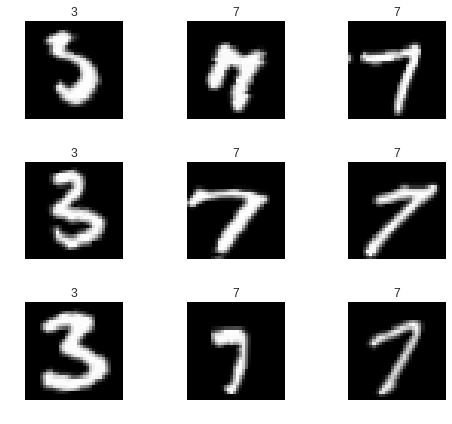

In [64]:
data.show_batch(rows=3, figsize=(7,6))

In [65]:
print(data.classes)

['3', '7']


**Based on 'MNIST_TINY' data, I'm going to build binary classifiier using pretrained ResNet34.<br>
This time, because data is much smaller than 'URLs.PETS', I increased number of epoch**

In [0]:
q7 = create_cnn(data, models.resnet34, metrics=error_rate)

In [68]:
q7.fit_one_cycle(20)

epoch,train_loss,valid_loss,error_rate
1,0.399089,0.312923,0.133047
2,0.388893,0.229688,0.090129
3,0.364266,0.164008,0.060086
4,0.329100,0.138652,0.048641
5,0.313432,0.137631,0.045780
6,0.297528,0.136739,0.050072
7,0.280352,0.127702,0.044349
8,0.261879,0.116634,0.034335
9,0.238186,0.096059,0.032904
10,0.229752,0.091041,0.028612


In [0]:
q7.save('cycle1')

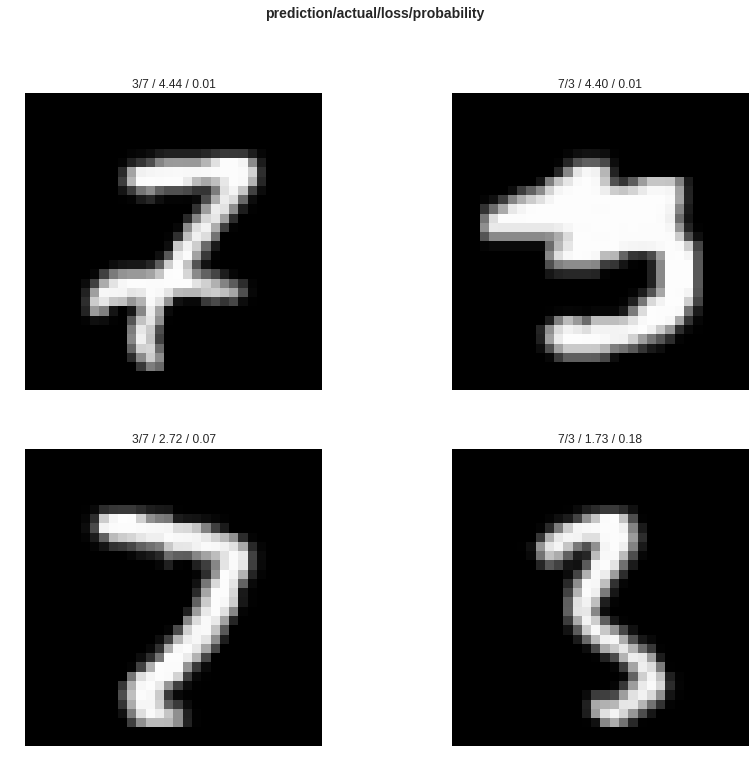

In [71]:
q7mis = ClassificationInterpretation.from_learner(q7)
q7mis.plot_top_losses(4, figsize=(14,12))

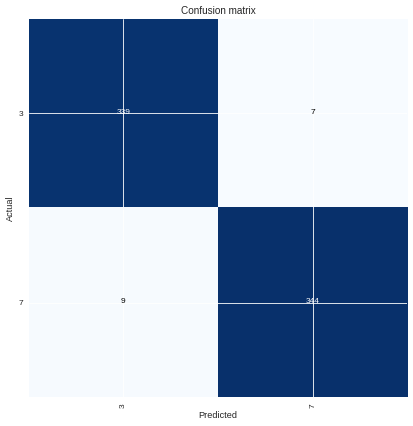

In [72]:
q7mis.plot_confusion_matrix(figsize=(7,7), dpi=60)

**Confusion matrix is telling that the model has low error rate. However, the tends to predict '3' wrong more often than prediction upon '7'. **

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06


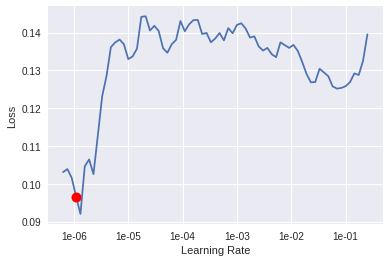

In [73]:
q7.lr_find()
q7.recorder.plot()

**Here, learning rate between 1e-06 and 1e-05 achieves the least loss and the performance gets worse since then. So, I'll slice the model into this range with less number of epoch.**

In [75]:
q7.unfreeze()
q7.fit_one_cycle(5, max_lr = slice(1e-06, 1e-05))

epoch,train_loss,valid_loss,error_rate
1,0.124887,0.070139,0.022890
2,0.131212,0.068297,0.018598
3,0.130986,0.065953,0.027182
4,0.120850,0.068790,0.027182
5,0.134581,0.068277,0.024320


In [0]:
q7.save('cycle2')

**Built Binary Classifier which is computationally more efficient while achieving similar performance.**